<a href="https://colab.research.google.com/github/anand1994sp/MACHINE-LEARNING-PROJECTS/blob/main/Multi_Linear_Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [ ]:
usa=pd.read_csv('/content/USA_Housing.csv')
usa.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [ ]:
# We have to drop "Address " column as this is non significant varieable for predicting price of the data
usa=usa.drop(['Address'],axis=1)
usa.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


In [ ]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
# Pre-processing method
## Step 1 : handling missing data - there is no missing data found
usa.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [ ]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
## Step 2 : Encoding - there is no object/ char variable, hence not required
## Step 3 : Handling outliers
  ## 1. Outlier found - Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms,Area Population

In [ ]:
usa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

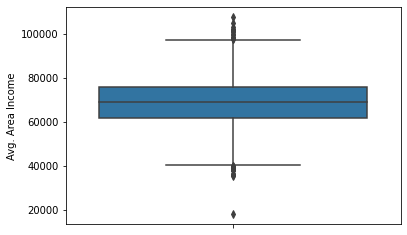

In [ ]:
#sns.boxplot(y='Avg. Area Income',data = usa)
sns.boxplot(y=usa["Avg. Area Income"])

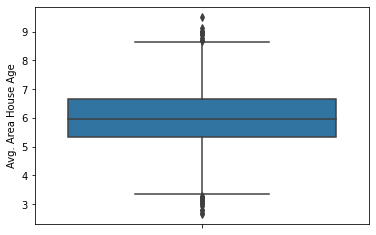

In [ ]:
sns.boxplot(y='Avg. Area House Age',data = usa)

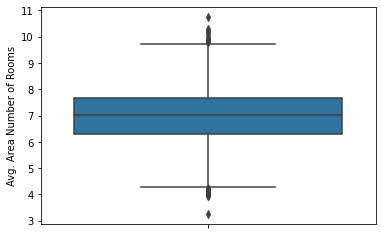

In [ ]:
sns.boxplot(y='Avg. Area Number of Rooms',data = usa)

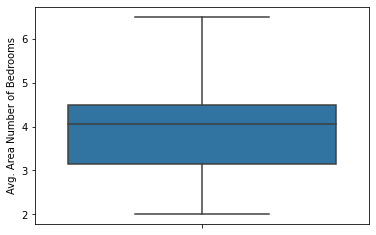

In [ ]:
sns.boxplot(y='Avg. Area Number of Bedrooms',data = usa)

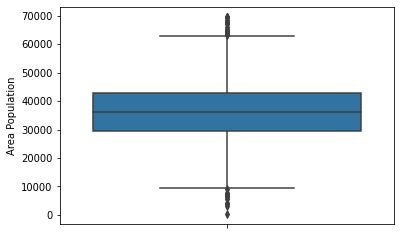

In [ ]:
sns.boxplot(y='Area Population',data = usa)

In [ ]:
Q1=usa.quantile(0.25)
Q3=usa.quantile(0.75)
IQR=Q3-Q1
P_O=Q3+1.5*IQR
N_O=Q1-1.5*IQR
print(Q1)
print(Q3)
print(IQR)
print(P_O)
print(N_O)

Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64
Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of

In [ ]:
usa=usa[~((usa<N_O) | (usa>P_O)).any(axis=1)]

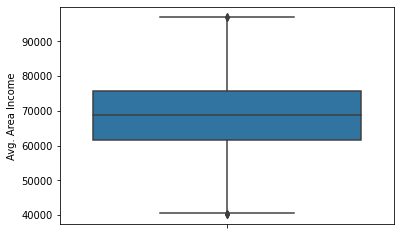

In [ ]:
sns.boxplot(y='Avg. Area Income',data =usa)

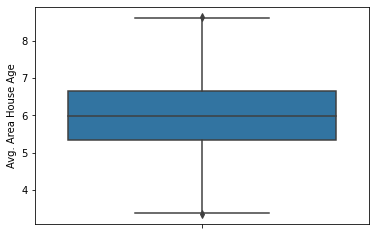

In [ ]:
sns.boxplot(y='Avg. Area House Age',data = usa)

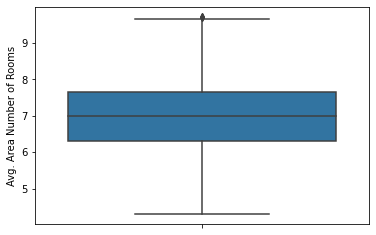

In [ ]:
sns.boxplot(y='Avg. Area Number of Rooms',data = usa)

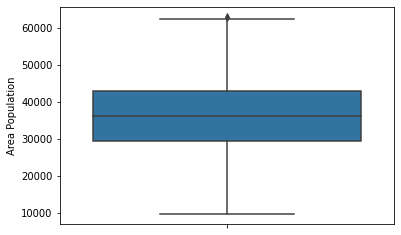

In [ ]:
sns.boxplot(y='Area Population',data = usa)

In [ ]:
# Split the data into independent varaible and dependent variable
x = usa.iloc[:,0:-1]
y=usa.iloc[:,-1] 
x.head(2)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174


In [ ]:
y.head(2)

0    1.059034e+06
1    1.505891e+06
Name: Price, dtype: float64

In [ ]:
# Step 4 : Featuree Scaling

In [ ]:
x.shape

(4865, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

In [ ]:
x_scaler.shape[0]

4865

In [ ]:
#Exploratory Data Analysis (EDA)

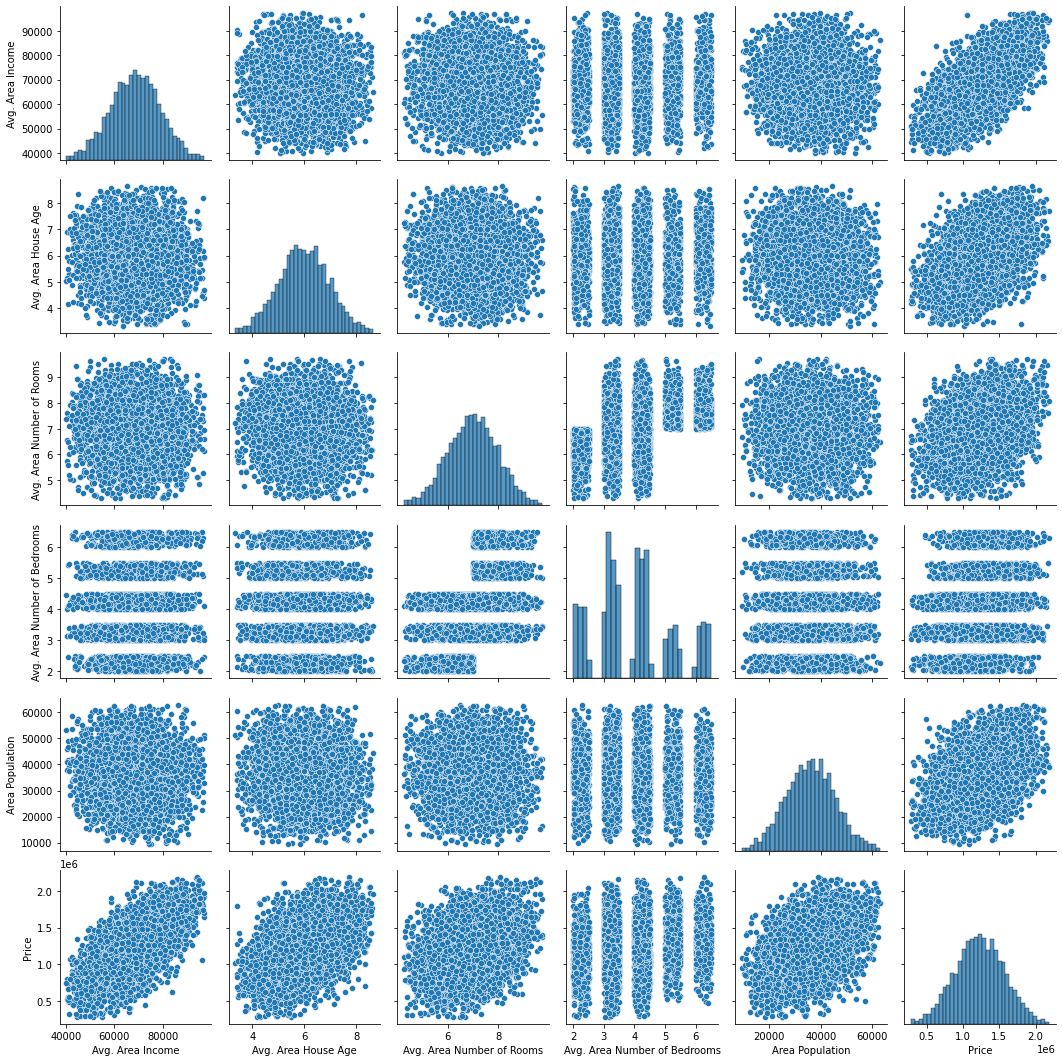

In [ ]:
sns.pairplot(usa)

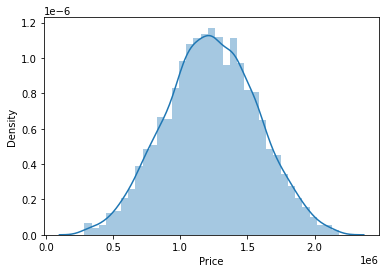

In [ ]:
sns.distplot(usa['Price'])

In [ ]:
usa.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


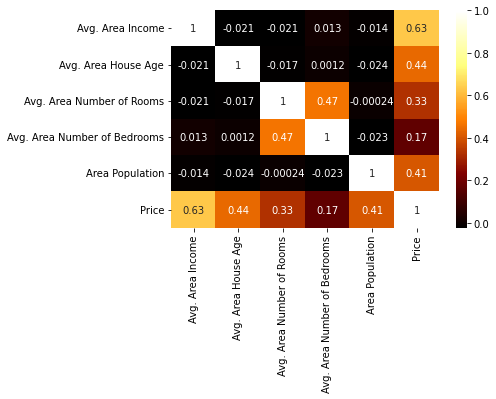

In [ ]:
sns.heatmap(usa.corr(),annot=True,cmap="afmhot")

In [ ]:
#Varience Inflation Factor(VIF) - To check multicollinearity

In [ ]:
#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


In [ ]:
# split the data in test and train

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,train_size=0.75,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3648, 5)
(1217, 5)
(3648,)
(1217,)


In [ ]:
## Model Building
## Simple Method
## OLS method
## Rigde
## Lasso
## Prediction
## Evaluation
## Conclude

In [ ]:
# Model Building - Linear Regression

#Simple Method

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
linear_model.intercept_    # Finding the c

1232069.1668541944

In [ ]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [ ]:
linear_model.coef_     # Finding the slope (m)

array([221457.8062912 , 159652.54300231, 117588.33323273,   3287.55703827,
       145399.57381178])

In [ ]:
y_pred=linear_model.predict(x_test)         # Finding the predicted value(y cap)

In [ ]:
# predicting the x_test result basis x_train model 
y_pred

array([1296308.27760367, 1513172.94235777, 1088579.86706825, ...,
       1428360.89350341,  761380.84135441,  992514.68882434])

In [ ]:
y_test

3409    1.262553e+06
583     1.412243e+06
3019    1.151342e+06
3808    1.341450e+06
1543    6.713439e+05
            ...     
3721    1.281537e+06
3152    9.926228e+05
4763    1.535781e+06
1819    9.086165e+05
1923    8.970132e+05
Name: Price, Length: 1217, dtype: float64

In [ ]:
# Evalutation your model with actual data and prediction data
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9125707180361262


In [ ]:
# Regression Model with "OLS" method
# OLS is a Algorithm (Ordinary Least Square)
#from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as srlm
reg_model=srlm.OLS(exog=x_train,endog=y_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):              0.062
Method:                 Least Squares   F-statistic:                              49.28
Date:                Thu, 03 Nov 2022   Prob (F-statistic):                    1.60e-49
Time:                        17:27:40   Log-Likelihood:                         -56348.
No. Observations:                3648   AIC:                                  1.127e+05
Df Residuals:                    3643   BIC:                                  1.127e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.063e+05   2.04e+04     10.095      0.000    1.66e+05    2.46e+05
x2          1.641e+05   2.04e+04      8.033      0.000    1.24e+05    2.04e+05
x3          1.356e+05   2.34e+04      5.799      0.000    8.97e+04    1.81e+05
x4         -6259.9147   2.32e+04     -0.270      0.787   -5.17e+04    3.91e+04
x5          1.499e+05   2.05e+04      7.311      0.000     1.1e+05     1.9e+05
==============================================================================
Omnibus:                        2.229   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                2.153
Skew:                           0.019   Prob(JB):                        0.341
Kurtosis:                       2.887   Cond. No.                         1.67
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x1=x
x1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3648, 5)
(1217, 5)
(3648,)
(1217,)


In [ ]:
reg_model=srlm.OLS(endog=y_train,exog=x_train).fit()   # While Derbin watson value is is b/w 1.5-2.5. chacke and drop the column when the P value is greater
reg_model.summary()                                         # than 0.05. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.140e+04
Date:                Thu, 03 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:29:06   Log-Likelihood:                         -50241.
No. Observations:                3648   AIC:                                  1.005e+05
Df Residuals:                    3643   BIC:                                  1.005e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1917      0.308     33.060      0.000       9.587      10.796
Avg. Area House Age           5.183e+04   3373.132     15.367      0.000    4.52e+04    5.84e+04
Avg. Area Number of Rooms     -1.14e+04   3746.057     -3.043      0.002   -1.87e+04   -4055.448
Avg. Area Number of Bedrooms  7681.3886   3514.480      2.186      0.029     790.845    1.46e+04
Area Population                  8.0078      0.377     21.231      0.000       7.268       8.747
==============================================================================
Omnibus:                       10.233   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.400
Skew:                          -0.031   Prob(JB):                       0.0150
Kurtosis:                       2.774   Cond. No.                     9.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

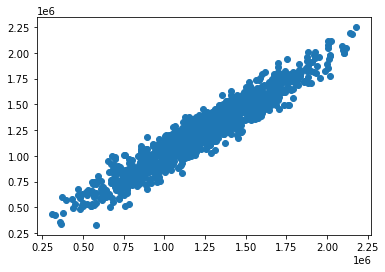

In [ ]:
plt.scatter(y_test,y_pred)

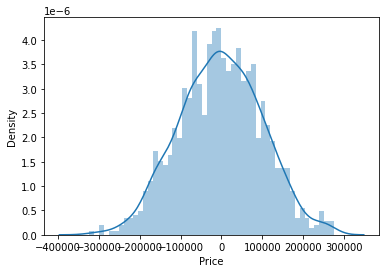

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
# Mean Absolute Value (Total residual value)
from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test,y_pred))

MAE :  81315.10131345264


In [ ]:
print('MAPE : ',metrics.mean_absolute_error(y_test,y_pred)*100)

MAPE :  8131510.131345265


In [ ]:
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))

MSE :  10223177913.740753


In [ ]:
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE :  101109.73204267111


In [ ]:
# Regularzation
## Ridge, Lasso, ElasticNet

from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
#import statsmodels.api as sma

In [ ]:
lasso_model = LassoCV(cv=10, max_iter=10000,normalize=True)
lasso_model.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [ ]:
lasso_model.score(x_train,y_train)

0.9115196170687158

In [ ]:
lasso_model.score(x_test,y_test)

0.9125770655373523

In [ ]:
ridgecv= RidgeCV(cv=10, normalize= True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [ ]:
ridgecv.score(x_train,y_train)

0.9030198467428465

In [ ]:
ridgecv.score(x_test,y_test)

0.9035556532855754

In [ ]:
# Linear regression
# 1. Adjested R square = 96.7 % (accuracy)
# 2. All independent variables are statically significant (p<=0.05)
# 3. Assumptions
    # 4. data is linear line(scatter plot)
    # 1. there is no hetroscadicity(no outlier)(boxplot,iqr method)
    # 3. there is no multicollinearity (vif above 5 remove or heatmap)
    # 6. there is no autocorrelation(darbin watson test)2=no correlation,1.5 to 2.5 pvalue should be less than 0.05 else removed  
    # 2. selected right dependent and individual variable, hence, no endoginity problem.
    # 5. data should be normally distributed and zero mean of error(distplot)
# There is no underfit or overfit exist in this model ( checked by ridge and lasso method)
    # by using regularisation method
# We also also calculated all 4 methods (MAE,MAPE,MSE and RMSE) 
# Bias is difference b/w train and test values less than 70%  (Underfit)
# Varience is difference b/w train and test values less than 15% (Overfit)